In [52]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [155]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [156]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [157]:
#train_images.shape
#train_images[0].shape
print(train_images[0].shape)

(28, 28)


In [158]:
len(train_labels)

60000

In [159]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [160]:

test_images.shape

(10000, 28, 28)

In [161]:
len(test_labels)

10000

In [ ]:
test_images[test_labels == 8][0]

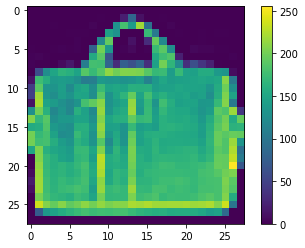

In [165]:
#데이터 전처리

plt.figure()
plt.imshow(test_images[test_labels == 8][10])
plt.colorbar()
plt.grid(False)
plt.show()

In [147]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [148]:
train_images = train_images / 255.0

test_images = test_images / 255.0

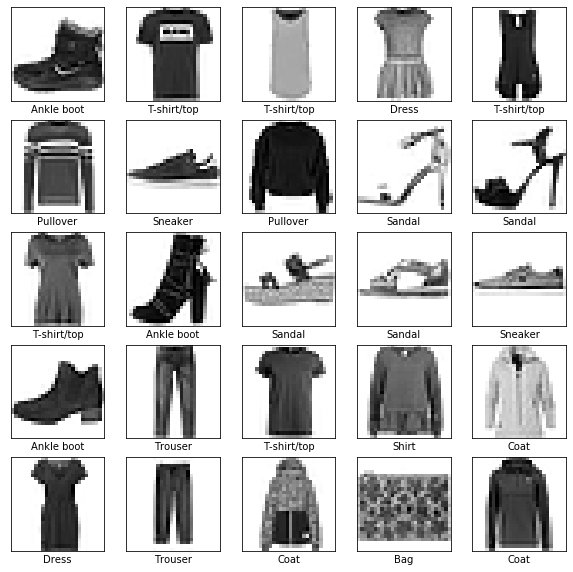

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [63]:
#층설정
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [64]:
#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
#모델 트레이닝
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4947 - acc: 0.8234
Epoch 2/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3752 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3380 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3147 - acc: 0.8841
Epoch 5/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2943 - acc: 0.8920


In [66]:
#정확도 평가

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.3423 - acc: 0.8735
테스트 정확도: 0.8735


In [153]:
test_bags_images = test_images[test_labels == 8]
test_bags = test_labels[test_labels == 8]


In [154]:
#정확도 평가

test_loss, test_acc = model.evaluate(test_bags_images, test_bags)

print('테스트 정확도:', test_acc)

1000/1000 [==============================] - 0s 48us/sample - loss: 0.1085 - acc: 0.9750
테스트 정확도: 0.975


In [68]:
predictions[0]

array([6.4405810e-08, 5.3418738e-08, 4.4930157e-09, 1.0535198e-08,
       1.6287454e-07, 2.5089866e-02, 5.8940242e-07, 1.7330542e-02,
       1.3217540e-06, 9.5757741e-01], dtype=float32)

In [69]:

np.argmax(predictions[0])

9

In [70]:

test_labels[0]

9

In [71]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

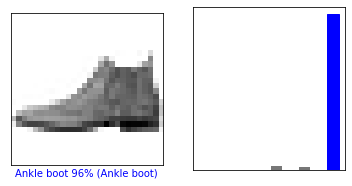

In [72]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

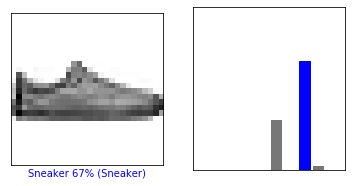

In [73]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

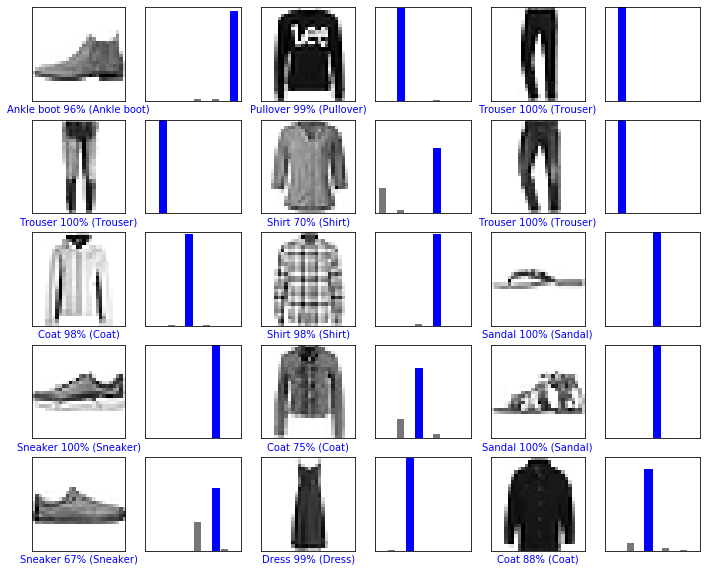

In [74]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [75]:

# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[8]
print(type(img))

<class 'numpy.ndarray'>


In [76]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [77]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.9912704e-05 3.0703194e-07 1.6695817e-06 2.9241676e-07 6.7518947e-08
  9.9938130e-01 1.3823305e-07 5.2052399e-04 5.6809722e-06 1.4268633e-07]]


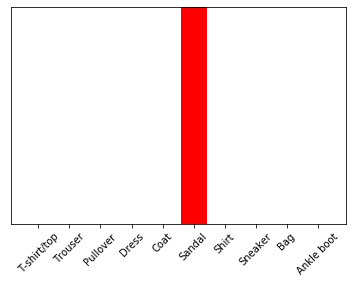

In [78]:

plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [79]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)
print(class_names[prediction_result])

5
Sandal


In [188]:
import cv2

image = cv2.imread('bag3.jpg')

In [189]:
def resize_image(image):
    return np.array(cv2.resize(image, (28,28)))[:,:,0]

In [190]:
test_image = resize_image(image)

In [191]:
test_image = 255 - test_image

In [192]:
test_image

array([[ 26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26],
       [ 26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26,  26,  26,  26,  26,  94,  47,  36,  20,  93,  82,  80,
         82,  26],
       [ 26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26,  26,  26,  26,  26,  24,  74,  86,  91,  99,  76,  83,
         24,  26],
       [ 26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26],
       [ 26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26],
       [ 26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,  26,
         26,  26],
       [ 2

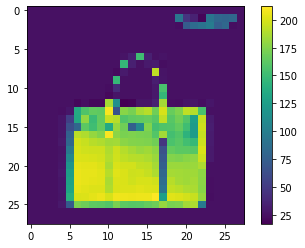

In [193]:
plt.figure()
plt.imshow(test_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [194]:
test_image = test_image / 255.0

In [195]:
pred = model.predict(np.expand_dims(test_image,0))

In [196]:
pred = np.argmax(pred)
pred

8

In [197]:
class_names[pred]

'Bag'